# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/ML/icml_face_data.csv'

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [5]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [6]:
## load dataset here
df = pd.read_csv(path)
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [7]:
## parsing data here
images, labels = parse_data(df)


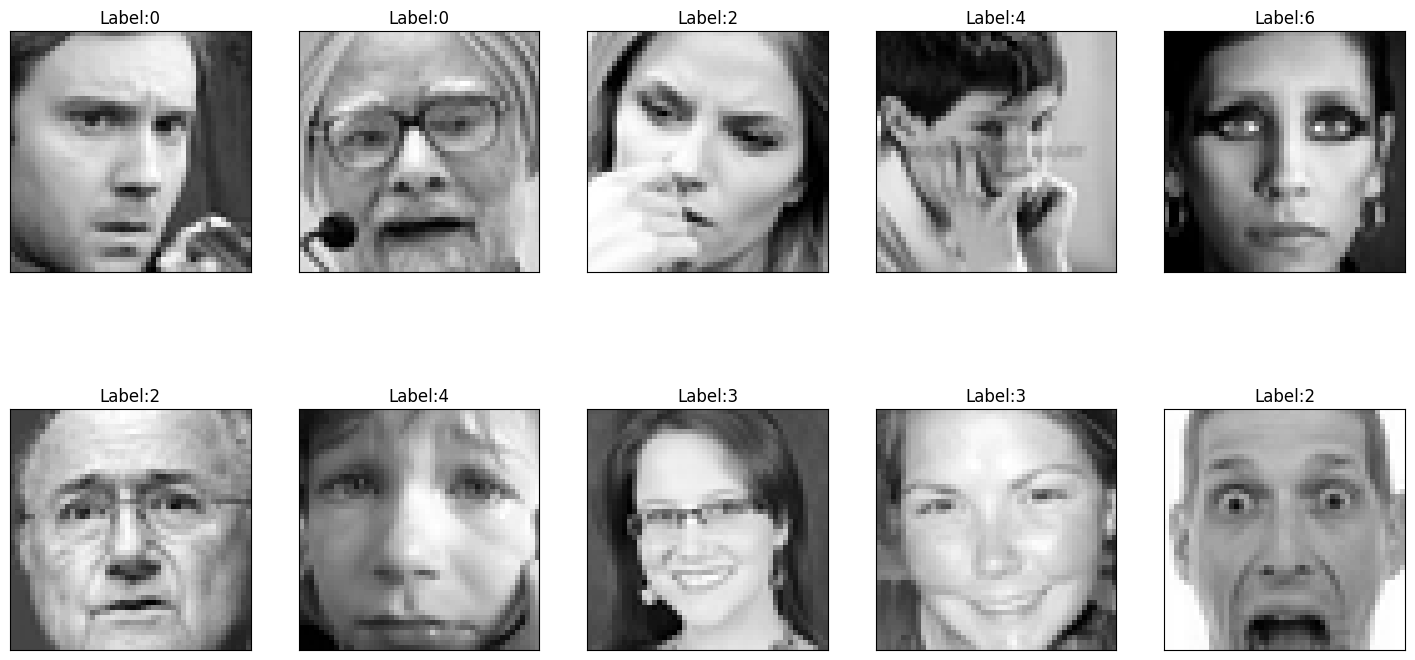

In [8]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

Scaler data

In [9]:
num_samples, height, width = images.shape
images_reshaped = images.reshape(num_samples, height * width)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images_reshaped)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_scaled)

In [11]:
## transform for visualizing here
images_pca=pca.transform(images_scaled) ## modify images' array to the appropriate shape
images_pca.shape

(35887, 2)

Biểu đồ trực quan hóa các điểm dữ liệu sau khi đã giảm chiều bằng PCA, với mỗi điểm được tô màu theo nhãn tương ứng. Điều này giúp chúng ta dễ dàng quan sát các cụm dữ liệu và mối quan hệ giữa các nhãn trong không gian PCA.

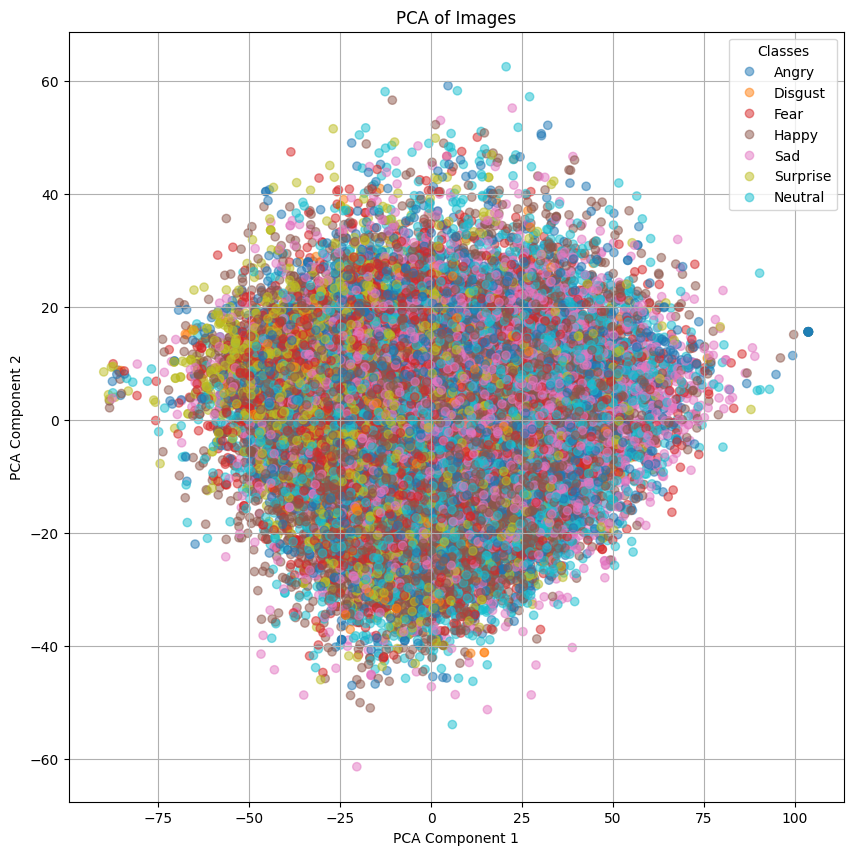

In [12]:
label_names = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
label_colors = ["red", "green", "blue", "orange", "purple", "yellow", "gray"]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

scatter = ax.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='tab10', alpha=0.5)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Images')
plt.grid(True)
handles, _ = scatter.legend_elements()
legend_labels = [label_names[i] for i in np.unique(labels)]
ax.legend(handles, legend_labels, title="Classes")

plt.show()

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

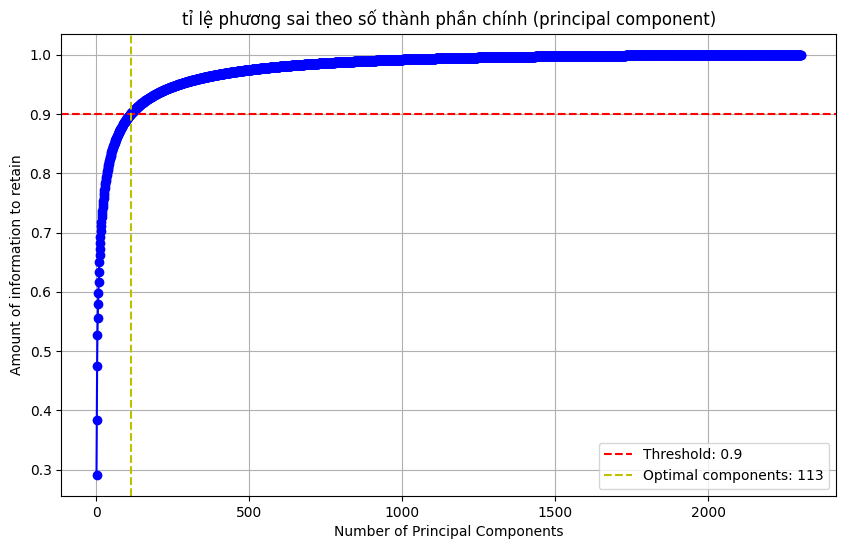

Optimal number of components: 113


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit the PCA model
pca = PCA()
pca.fit(images_scaled)

# Calculate cumulative explained variance ratio
variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Threshold for explained variance
threshold = 0.9

# Find optimal number of components
optimal_components = np.argmax(variance_ratio >= threshold) + 1

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o', linestyle='-', color='b')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
plt.axvline(x=optimal_components, color='y', linestyle='--', label=f'Optimal components: {optimal_components}')
plt.xlabel('Number of Principal Components')
plt.ylabel('Amount of information to retain')
plt.title('tỉ lệ phương sai theo số thành phần chính (principal component)')
plt.legend()
plt.grid(True)
plt.show()

# Print optimal number of components
print("Optimal number of components:", optimal_components)


#Answer
Đồ thị trên biểu diễn lượng thông tin cần giữ lại hay tỉ lệ phương sai theo số thành phần chính (principal component)

Để xác định số thành phần chính tối ưu:
- Ta chọn ngưỡng hay lượng thông tin cần giữ lại, ở đây thì lượng thông tin cần giữ lại để xác định số thành phần tối ưu nhóm chọn là 90%
- Thì ta xác định bằng cách lấy giá trị của trục hoành ứng với giá trị 90% hay 0.9, sau đó cộng thêm cho 1, ta sẽ có được số thành phần chính tối ưu

**Do vậy, nếu ta giảm chiều dữ liệu còn 113 chiều, thì sẽ giữ được khoảng 90% lượng thông tin ban đầu, như vậy ta có thể nói 113 là số thành phần tối ưu cần giữ lại**


In [14]:
## determine the optimal number of PCs here
## pca.explained_variance_()

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

Part I: Get Train and Test Data

In [26]:
# Chia dữ liệu thành
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_reshaped, labels, test_size=0.1, random_state=42)

I.1 Train and Test data for Original Data

In [27]:
X_train_ori = scaler.fit_transform(X_train)
X_test_ori = scaler.transform(X_test)

I.2 Train and Test data for PCA Data Utilize the optimal number of principal components

In [28]:
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(X_train_ori)
X_test_pca = pca.transform(X_test_ori)

Part II: BUILD MODELS

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

**Ở phần này, nhóm đã chọn:**

3 Model ML là:
- Decision Tree
- Logistic Regression
- KNN (K-Nearest Neighnbors)

Và MLP (Multilayer Perceptron)

***1. Model Decision Tree***

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search with Decision Tree on original data
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=2)
grid_search_dt.fit(X_train_ori, y_train)
y_pred_dt_original = grid_search_dt.predict(X_test_ori)

# Evaluate the model on original data
print("Decision Tree - Original Data")
print(classification_report(y_test, y_pred_dt_original))
print("Accuracy:", accuracy_score(y_test, y_pred_dt_original))



Decision Tree - Original Data
              precision    recall  f1-score   support

           0       0.22      0.13      0.17       498
           1       0.33      0.02      0.04        52
           2       0.28      0.17      0.21       545
           3       0.39      0.53      0.45       881
           4       0.26      0.25      0.26       588
           5       0.47      0.29      0.36       414
           6       0.25      0.39      0.31       611

    accuracy                           0.32      3589
   macro avg       0.32      0.26      0.26      3589
weighted avg       0.32      0.32      0.30      3589

Accuracy: 0.3165227082752856


In [47]:
# Grid search with Decision Tree on PCA-transformed data
grid_search_dt_pca = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=2)
grid_search_dt_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = grid_search_dt_pca.predict(X_test_pca)

# Evaluate the model on PCA-transformed data
print("\nDecision Tree - PCA Data")
print(classification_report(y_test, y_pred_dt_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_dt_pca))



Decision Tree - PCA Data
              precision    recall  f1-score   support

           0       0.23      0.15      0.18       498
           1       0.38      0.06      0.10        52
           2       0.24      0.20      0.22       545
           3       0.36      0.59      0.45       881
           4       0.23      0.24      0.24       588
           5       0.41      0.27      0.32       414
           6       0.27      0.22      0.24       611

    accuracy                           0.30      3589
   macro avg       0.30      0.25      0.25      3589
weighted avg       0.29      0.30      0.29      3589

Accuracy: 0.30342713847868485


***2. Model Logistic Regression***

In [33]:
from sklearn.linear_model import LogisticRegression
# Hyperparameter tuning với GridSearchCV
param_grid_lr = {'C': [0.001, 0.01]}

# GridSearchCV cho dữ liệu gốc
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=2)
grid_search_lr.fit(X_train_ori, y_train)
y_pred_lr_original = grid_search_lr.predict(X_test_ori)

# Đánh giá mô hình trên dữ liệu gốc
print("Logistic Regression - Original Data")
print(classification_report(y_test, y_pred_lr_original))
print("Accuracy:", accuracy_score(y_test, y_pred_lr_original))




Logistic Regression - Original Data
              precision    recall  f1-score   support

           0       0.29      0.17      0.21       498
           1       1.00      0.02      0.04        52
           2       0.28      0.14      0.19       545
           3       0.42      0.67      0.52       881
           4       0.27      0.27      0.27       588
           5       0.49      0.47      0.48       414
           6       0.37      0.37      0.37       611

    accuracy                           0.37      3589
   macro avg       0.44      0.30      0.30      3589
weighted avg       0.36      0.37      0.35      3589

Accuracy: 0.37169127890777376


In [34]:
# GridSearchCV cho dữ liệu PCA
grid_search_lr_pca = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_lr, cv=2)
grid_search_lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = grid_search_lr_pca.predict(X_test_pca)
# Đánh giá mô hình trên dữ liệu PCA
print("\nLogistic Regression - PCA Data")
print(classification_report(y_test, y_pred_lr_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_lr_pca))


Logistic Regression - PCA Data
              precision    recall  f1-score   support

           0       0.30      0.15      0.20       498
           1       0.00      0.00      0.00        52
           2       0.32      0.13      0.19       545
           3       0.41      0.70      0.52       881
           4       0.28      0.28      0.28       588
           5       0.45      0.46      0.46       414
           6       0.36      0.35      0.35       611

    accuracy                           0.37      3589
   macro avg       0.30      0.30      0.28      3589
weighted avg       0.35      0.37      0.34      3589

Accuracy: 0.37169127890777376


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***3. Model KNN***

In [35]:
from sklearn.neighbors import KNeighborsClassifier
param_grid_knn = {'n_neighbors': [7,9]}

# GridSearchCV cho dữ liệu gốc
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=2)
grid_search_knn.fit(X_train_ori, y_train)
y_pred_knn_original = grid_search_knn.predict(X_test_ori)

# Đánh giá mô hình trên dữ liệu gốc
print("K-Nearest Neighbors - Original Data")
print(classification_report(y_test, y_pred_knn_original))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_original))



K-Nearest Neighbors - Original Data
              precision    recall  f1-score   support

           0       0.30      0.21      0.25       498
           1       0.19      0.23      0.21        52
           2       0.32      0.28      0.30       545
           3       0.40      0.51      0.45       881
           4       0.33      0.27      0.29       588
           5       0.50      0.34      0.40       414
           6       0.29      0.39      0.33       611

    accuracy                           0.35      3589
   macro avg       0.33      0.32      0.32      3589
weighted avg       0.35      0.35      0.35      3589

Accuracy: 0.3502368347729172


In [36]:
# GridSearchCV cho dữ liệu pca
grid_search_knn_pca = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=2)
grid_search_knn_pca.fit(X_train_pca, y_train)
y_pred_knn_pca = grid_search_knn_pca.predict(X_test_pca)
# Đánh giá mô hình trên dữ liệu pca
print("\nK-Nearest Neighbors - PCA Data")
print(classification_report(y_test, y_pred_knn_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_knn_pca))


K-Nearest Neighbors - PCA Data
              precision    recall  f1-score   support

           0       0.30      0.24      0.27       498
           1       0.22      0.25      0.23        52
           2       0.34      0.30      0.31       545
           3       0.41      0.56      0.47       881
           4       0.34      0.26      0.29       588
           5       0.50      0.37      0.43       414
           6       0.30      0.33      0.31       611

    accuracy                           0.36      3589
   macro avg       0.34      0.33      0.33      3589
weighted avg       0.36      0.36      0.35      3589

Accuracy: 0.36110337141264975


***4. Model Neural Networks (MLP)***

In [38]:
from sklearn.neural_network import MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(100,), (100, 100)],
    'activation': ['relu', 'tanh'],
    'max_iter': [500, 1000, 1500]
}

# Tạo mô hình MLP
mlp = MLPClassifier()

# GridSearchCV cho dữ liệu gốc
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=2)
grid_search_mlp.fit(X_train_ori, y_train)
y_pred_mlp_original = grid_search_mlp.predict(X_test_ori)

# Đánh giá mô hình trên dữ liệu gốc
print("Multilayer Perceptron - Original Data")
print(classification_report(y_test, y_pred_mlp_original))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp_original))



Multilayer Perceptron - Original Data
              precision    recall  f1-score   support

           0       0.32      0.32      0.32       498
           1       0.38      0.35      0.36        52
           2       0.35      0.32      0.34       545
           3       0.53      0.58      0.56       881
           4       0.34      0.36      0.35       588
           5       0.54      0.54      0.54       414
           6       0.40      0.38      0.39       611

    accuracy                           0.42      3589
   macro avg       0.41      0.40      0.41      3589
weighted avg       0.42      0.42      0.42      3589

Accuracy: 0.42490944552800225


In [39]:
# GridSearchCV cho dữ liệu pca
grid_search_mlp_pca = GridSearchCV(mlp, param_grid_mlp, cv=2)
grid_search_mlp_pca.fit(X_train_pca, y_train)
y_pred_mlp_pca = grid_search_mlp_pca.predict(X_test_pca)
# Đánh giá mô hình trên dữ liệu pca
print("\nMultilayer Perceptron - PCA Data")
print(classification_report(y_test, y_pred_mlp_pca))
print("Accuracy:", accuracy_score(y_test, y_pred_mlp_pca))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



Multilayer Perceptron - PCA Data
              precision    recall  f1-score   support

           0       0.31      0.28      0.30       498
           1       0.26      0.33      0.29        52
           2       0.34      0.29      0.31       545
           3       0.53      0.60      0.56       881
           4       0.33      0.31      0.32       588
           5       0.54      0.52      0.53       414
           6       0.35      0.37      0.36       611

    accuracy                           0.41      3589
   macro avg       0.38      0.39      0.38      3589
weighted avg       0.40      0.41      0.41      3589

Accuracy: 0.4093062134299248


In [49]:
import pandas as pd

# Summarize the results for each model
results = {
    'Model': [
        'Decision Tree (Original)', 'Decision Tree (PCA)',
        'Logistic Regression (Original)', 'Logistic Regression (PCA)',
        'K-Nearest Neighbors (Original)', 'K-Nearest Neighbors (PCA)',
        'Multilayer Perceptron (Original)', 'Multilayer Perceptron (PCA)'
    ],
    'Accuracy': [
        0.3165, 0.3034,
        0.3717, 0.3717,
        0.3502, 0.3611,
        0.4249, 0.4093
    ],
    'Macro Avg Precision': [
        0.32, 0.30,
        0.44, 0.30,
        0.33, 0.34,
        0.41, 0.38
    ],
    'Macro Avg Recall': [
        0.26, 0.25,
        0.30, 0.30,
        0.32, 0.33,
        0.40, 0.39
    ],
    'Macro Avg F1-Score': [
        0.26, 0.25,
        0.30, 0.28,
        0.32, 0.33,
        0.41, 0.38
    ],
    'Weighted Avg Precision': [
        0.32, 0.29,
        0.36, 0.35,
        0.35, 0.36,
        0.42, 0.41
    ],
    'Weighted Avg Recall': [
        0.32, 0.30,
        0.37, 0.37,
        0.35, 0.36,
        0.42, 0.41
    ],
    'Weighted Avg F1-Score': [
        0.30, 0.29,
        0.35, 0.34,
        0.35, 0.35,
        0.42, 0.41
    ]
}

# Create a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)


                              Model  Accuracy  Macro Avg Precision  \
0          Decision Tree (Original)    0.3165                 0.32   
1               Decision Tree (PCA)    0.3034                 0.30   
2    Logistic Regression (Original)    0.3717                 0.44   
3         Logistic Regression (PCA)    0.3717                 0.30   
4    K-Nearest Neighbors (Original)    0.3502                 0.33   
5         K-Nearest Neighbors (PCA)    0.3611                 0.34   
6  Multilayer Perceptron (Original)    0.4249                 0.41   
7       Multilayer Perceptron (PCA)    0.4093                 0.38   

   Macro Avg Recall  Macro Avg F1-Score  Weighted Avg Precision  \
0              0.26                0.26                    0.32   
1              0.25                0.25                    0.29   
2              0.30                0.30                    0.36   
3              0.30                0.28                    0.35   
4              0.32               

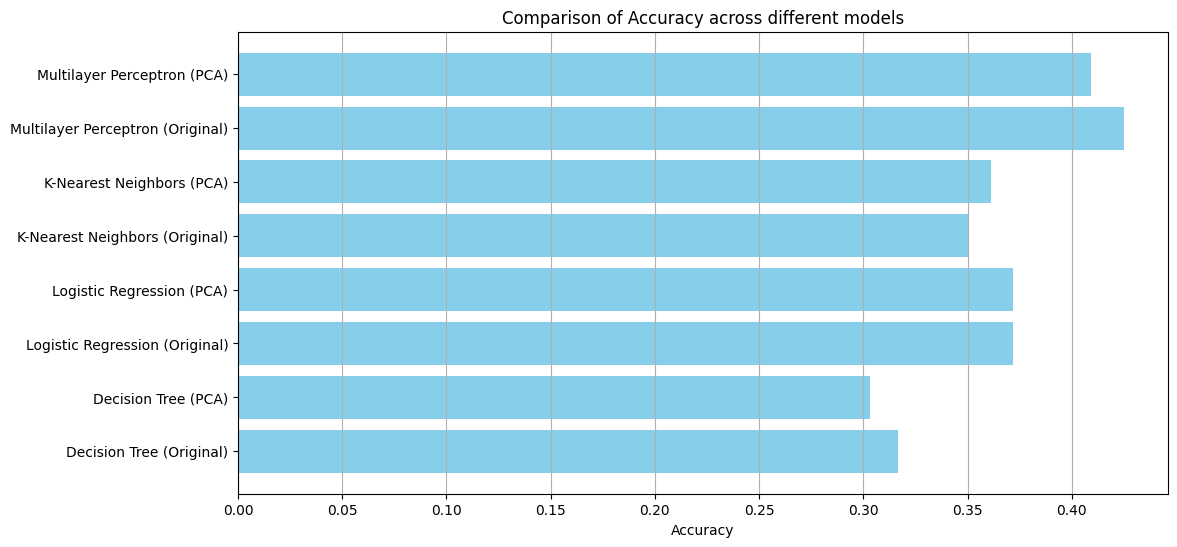

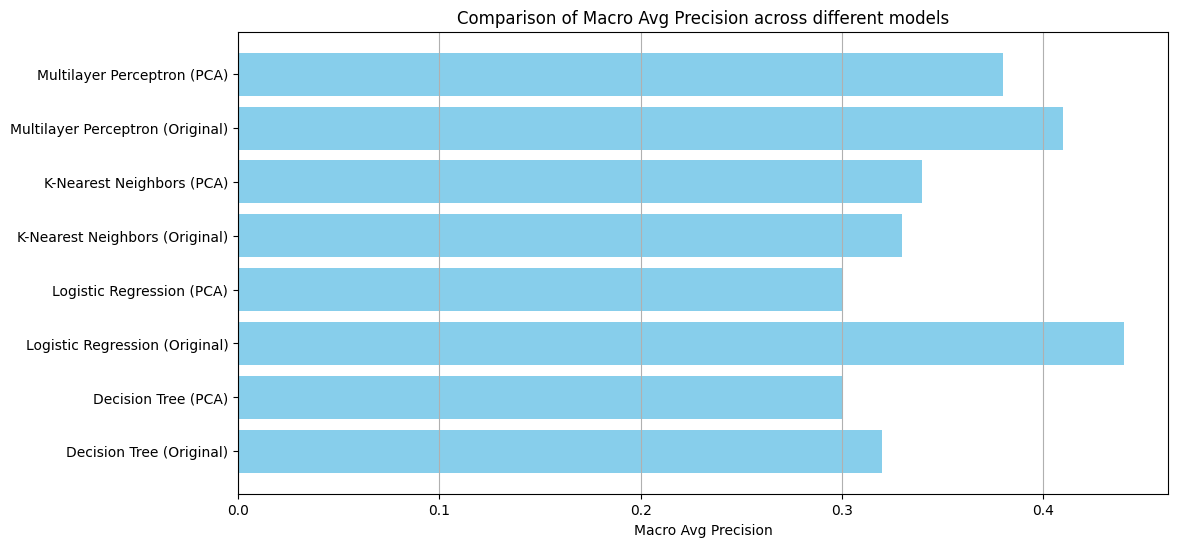

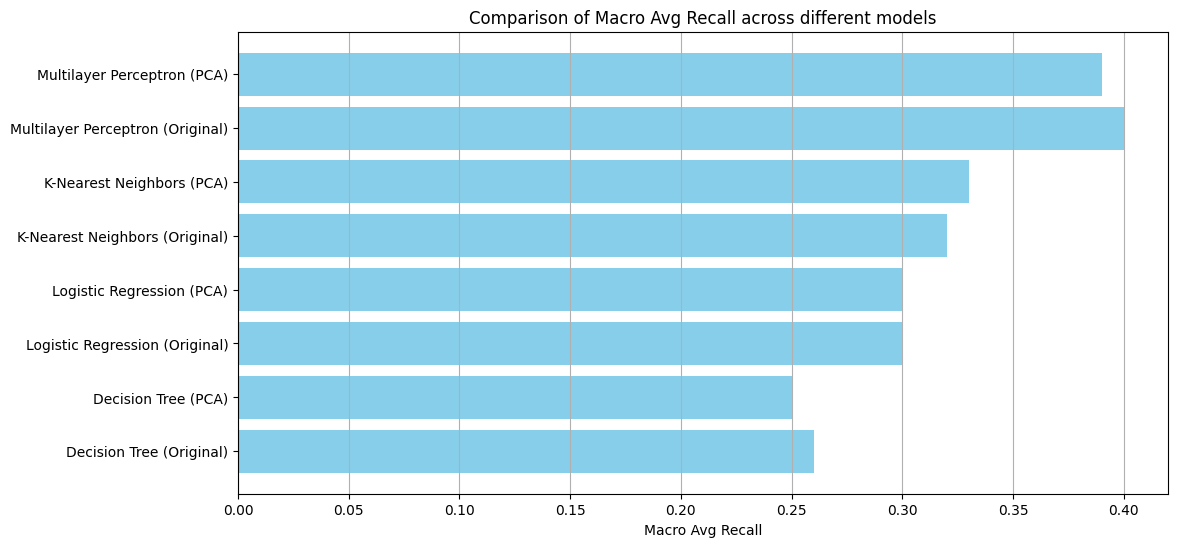

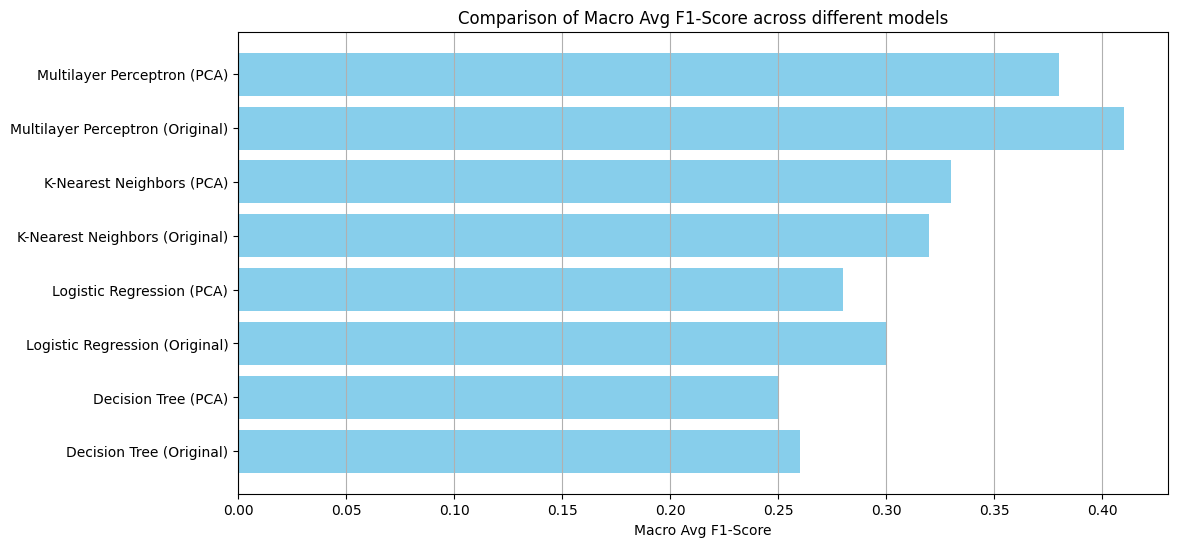

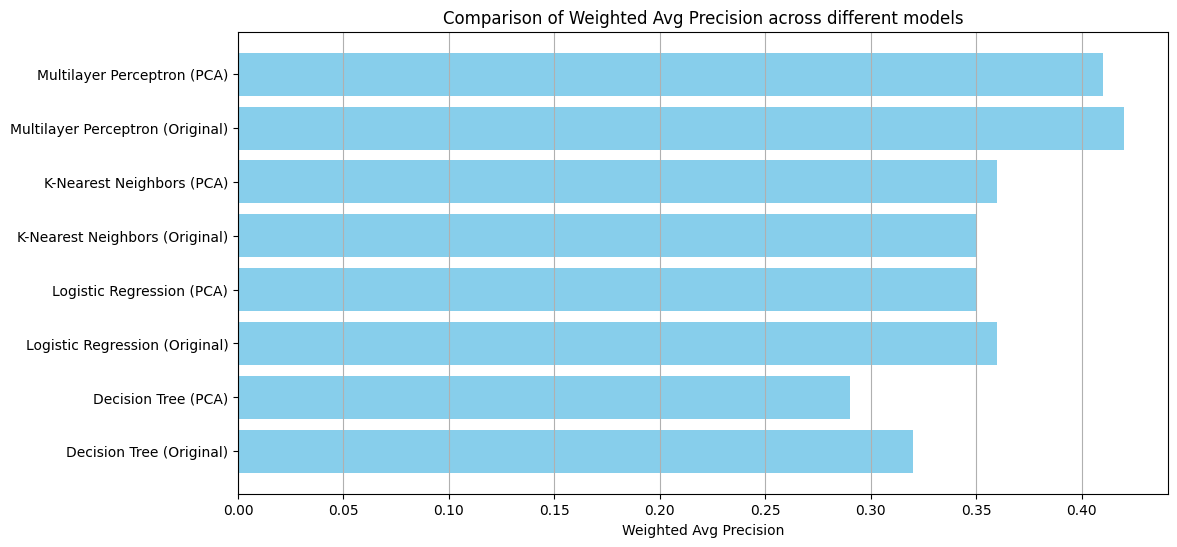

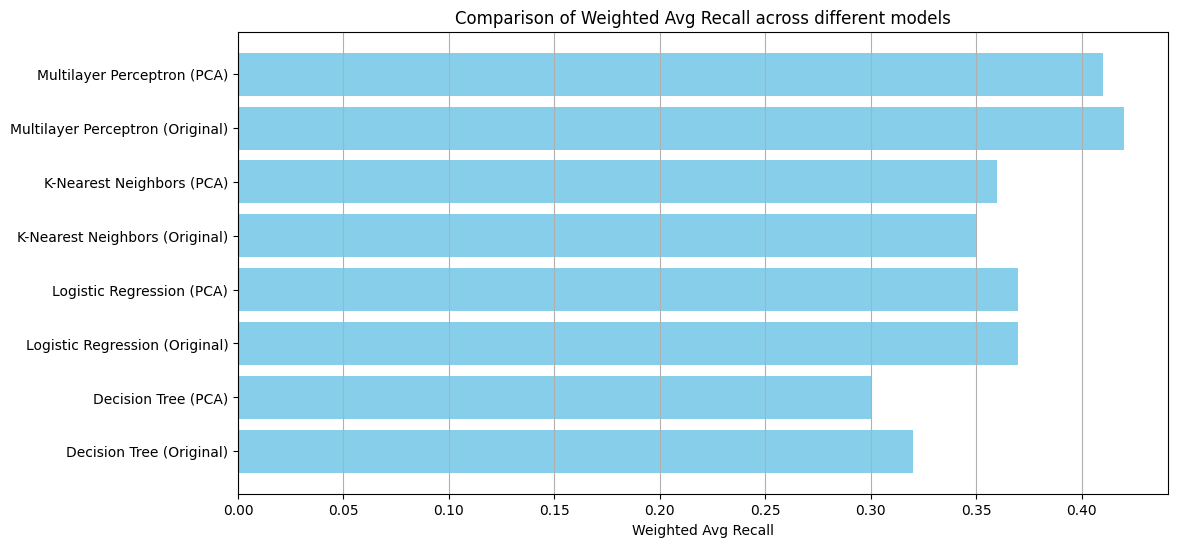

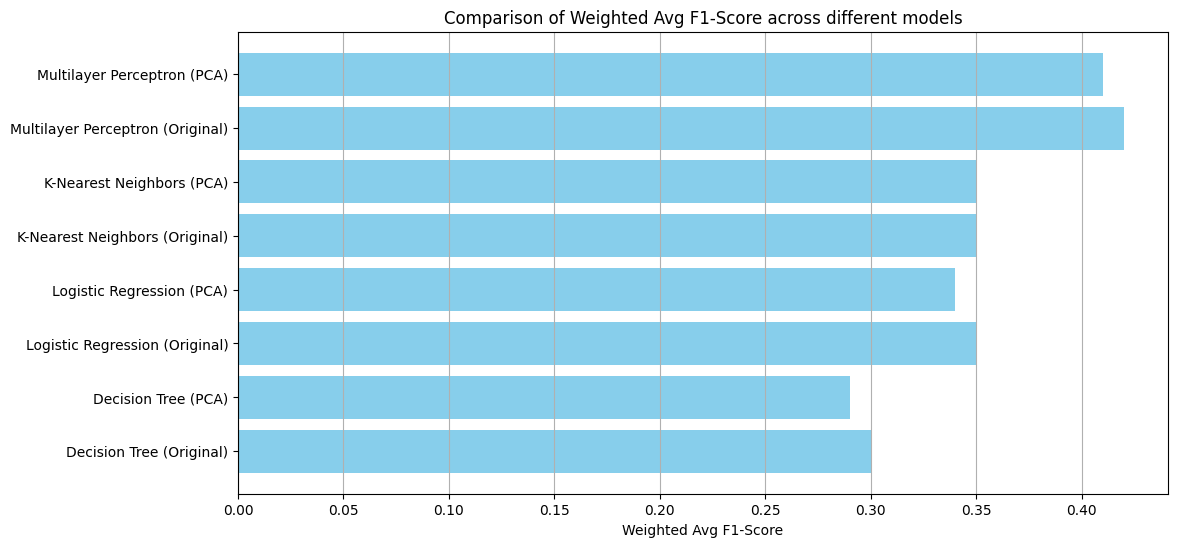

In [50]:
import matplotlib.pyplot as plt
# Biểu đồ so sánh các mô hình khác nhau dựa trên các số liệu đánh giá khác nhau
metrics = ['Accuracy', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1-Score',
           'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1-Score']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    plt.barh(df_results['Model'], df_results[metric], color='skyblue')
    plt.xlabel(metric)
    plt.title(f'Comparison of {metric} across different models')
    plt.grid(axis='x')
    plt.show()


In [ ]:
## splitting data into train/val/test subsets here

In [ ]:
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
## visualize the confusion matrices and classification reports here

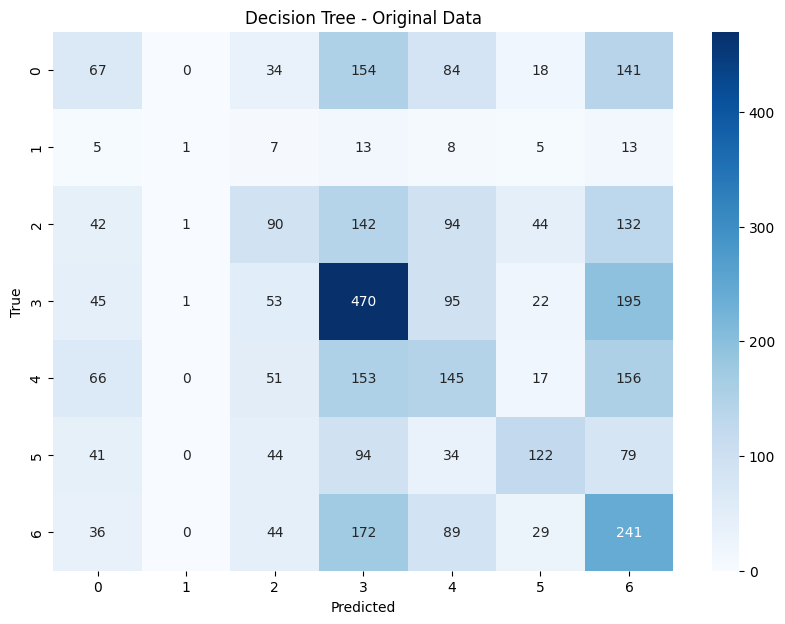

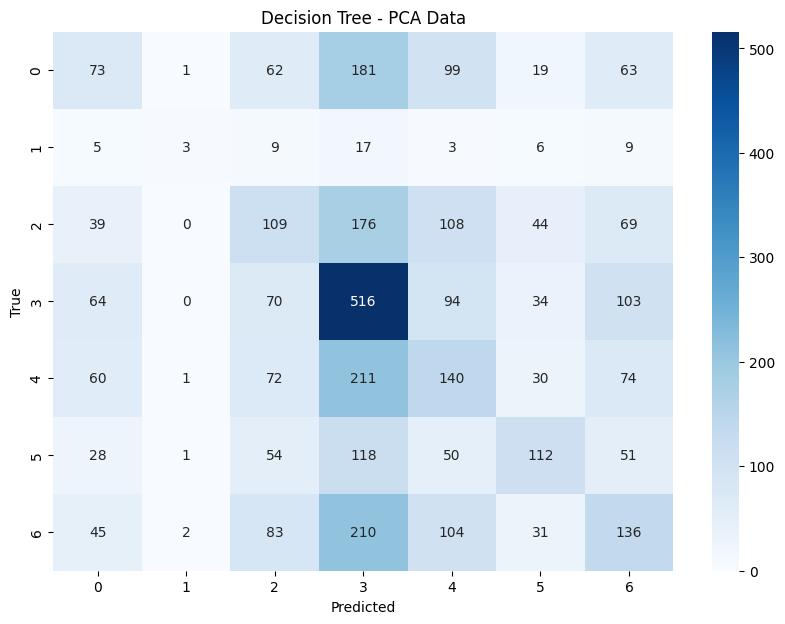

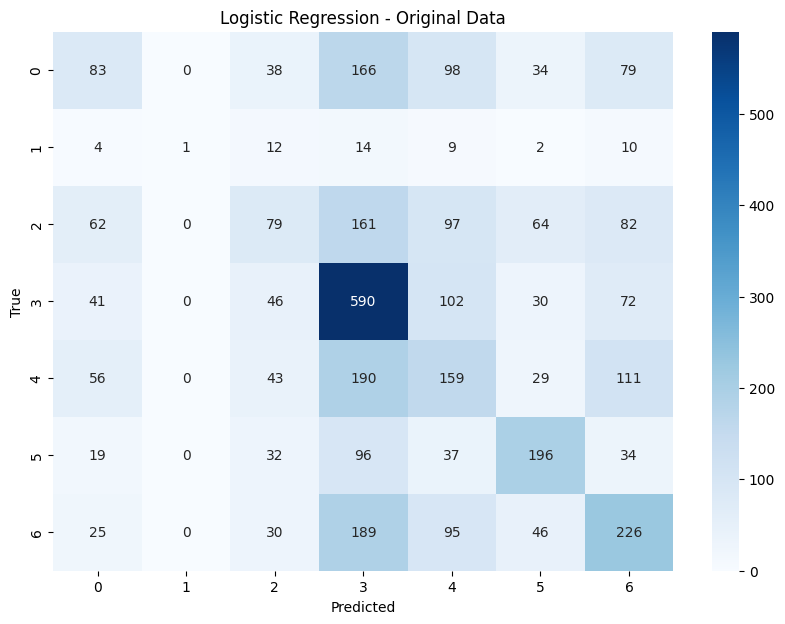

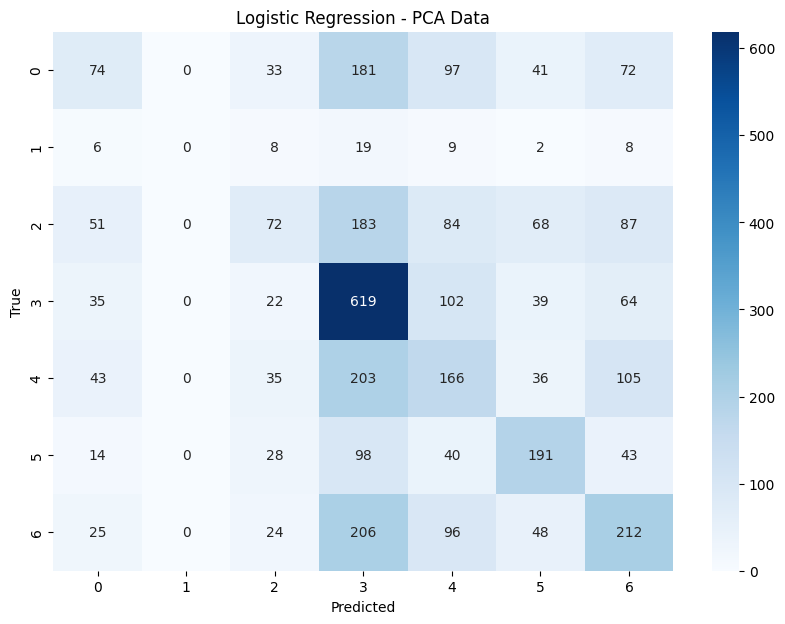

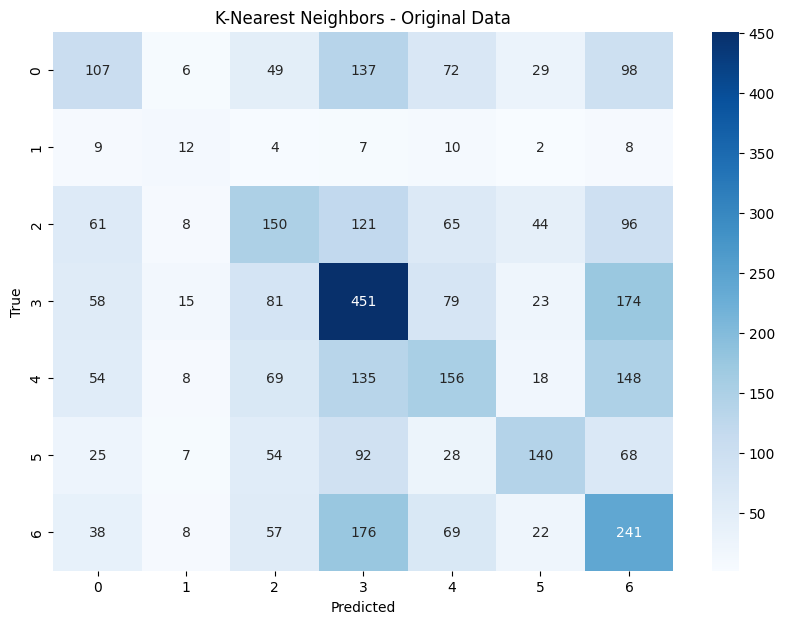

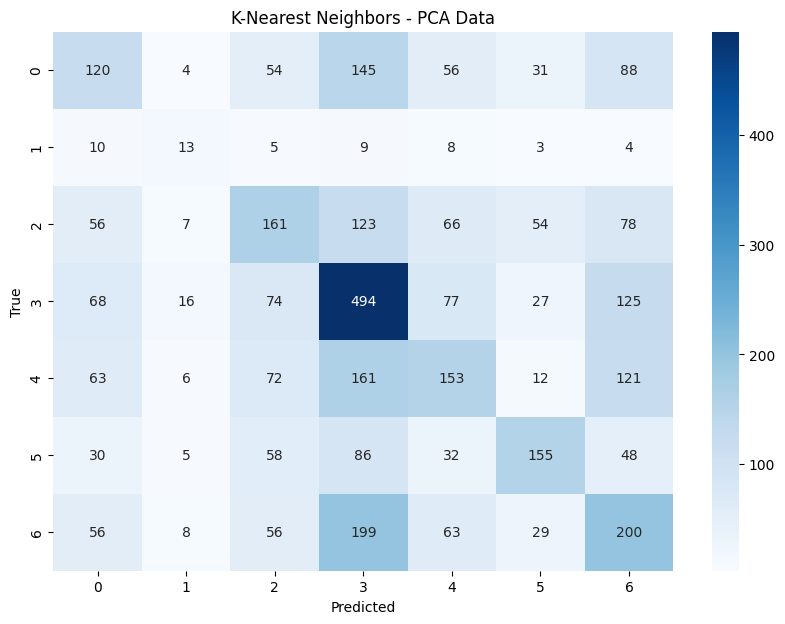

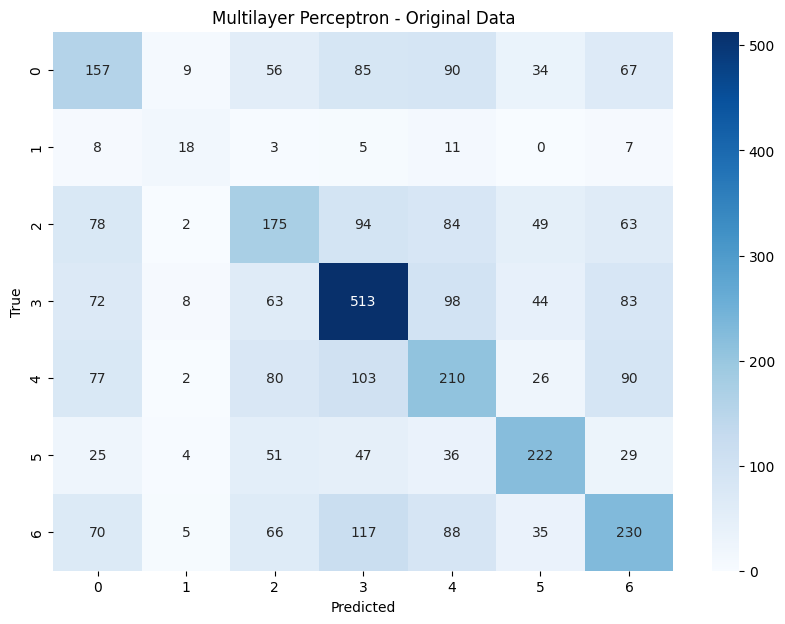

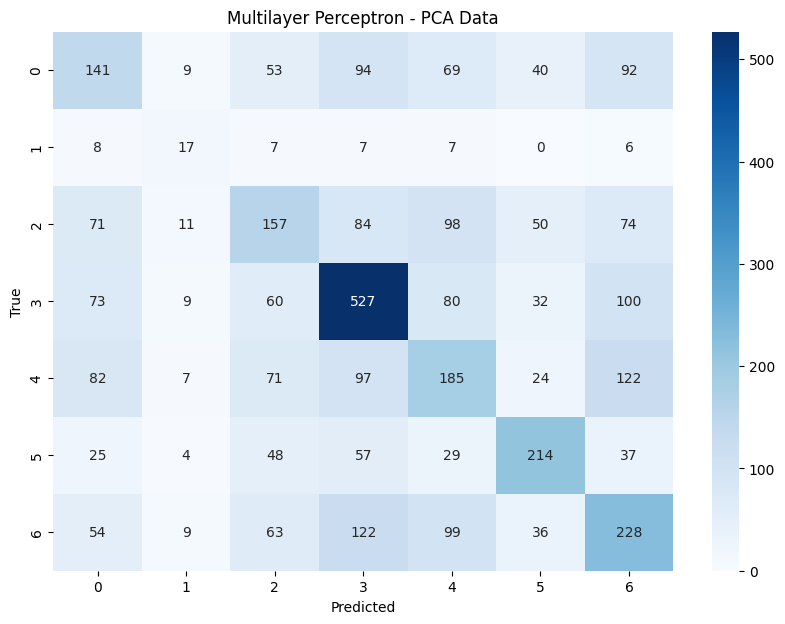

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Decision Tree - Original Data
plot_confusion_matrix(y_test, y_pred_dt_original, "Decision Tree - Original Data")

# Decision Tree - PCA Data
plot_confusion_matrix(y_test, y_pred_dt_pca, "Decision Tree - PCA Data")

# Logistic Regression - Original Data
plot_confusion_matrix(y_test, y_pred_lr_original, "Logistic Regression - Original Data")

# Logistic Regression - PCA Data
plot_confusion_matrix(y_test, y_pred_lr_pca, "Logistic Regression - PCA Data")

# K-Nearest Neighbors - Original Data
plot_confusion_matrix(y_test, y_pred_knn_original, "K-Nearest Neighbors - Original Data")

# K-Nearest Neighbors - PCA Data
plot_confusion_matrix(y_test, y_pred_knn_pca, "K-Nearest Neighbors - PCA Data")

# Multilayer Perceptron - Original Data
plot_confusion_matrix(y_test, y_pred_mlp_original, "Multilayer Perceptron - Original Data")

# Multilayer Perceptron - PCA Data
plot_confusion_matrix(y_test, y_pred_mlp_pca, "Multilayer Perceptron - PCA Data")


### So sánh hiệu suất các mô hình phân loại khác nhau

Chúng ta sẽ so sánh hiệu suất của các mô hình phân loại khác nhau sử dụng các số liệu: độ chính xác, độ chính xác, khả năng thu hồi và điểm F1. Mục tiêu là xác định mô hình nào hoạt động tốt nhất và loại cảm xúc nào được dự đoán chính xác nhất và loại cảm xúc nào mô hình mắc nhiều lỗi nhất.

### Độ chính xác (Accuracy)
Độ chính xác đo lường độ đúng đắn tổng thể của mô hình. Dưới đây là độ chính xác của từng mô hình:

- **Decision Tree (Dữ liệu gốc):** 0.3165
- **Decision Tree (Dữ liệu PCA):** 0.3034
- **Logistic Regression (Dữ liệu gốc):** 0.3717
- **Logistic Regression (Dữ liệu PCA):** 0.3717
- **K-Nearest Neighbors (Dữ liệu gốc):** 0.3502
- **K-Nearest Neighbors (Dữ liệu PCA):** 0.3611
- **Multilayer Perceptron (Dữ liệu gốc):** 0.4249
- **Multilayer Perceptron (Dữ liệu PCA):** 0.4093

Mô hình Multilayer Perceptron (MLP) trên dữ liệu gốc có độ chính xác cao nhất (0.4249), cho thấy nó dự đoán đúng nhãn nhiều hơn so với các mô hình khác.

### Độ chính xác (Precision)
Độ chính xác đo lường bao nhiêu trong số các trường hợp được dự đoán là dương tính thực sự là dương tính. Dưới đây là độ chính xác trung bình của các mô hình:

- **Decision Tree (Dữ liệu gốc):** 0.32
- **Decision Tree (Dữ liệu PCA):** 0.30
- **Logistic Regression (Dữ liệu gốc):** 0.44
- **Logistic Regression (Dữ liệu PCA):** 0.30
- **K-Nearest Neighbors (Dữ liệu gốc):** 0.33
- **K-Nearest Neighbors (Dữ liệu PCA):** 0.34
- **Multilayer Perceptron (Dữ liệu gốc):** 0.41
- **Multilayer Perceptron (Dữ liệu PCA):** 0.38

Mô hình Logistic Regression trên dữ liệu gốc có độ chính xác trung bình cao nhất (0.44), cho thấy nó dự đoán các trường hợp dương tính chính xác hơn.

### Thu hồi (Recall)
Khả năng thu hồi đo lường bao nhiêu trong số các trường hợp dương tính thực sự được mô hình phát hiện. Dưới đây là khả năng thu hồi trung bình của các mô hình:

- **Decision Tree (Dữ liệu gốc):** 0.26
- **Decision Tree (Dữ liệu PCA):** 0.25
- **Logistic Regression (Dữ liệu gốc):** 0.30
- **Logistic Regression (Dữ liệu PCA):** 0.30
- **K-Nearest Neighbors (Dữ liệu gốc):** 0.32
- **K-Nearest Neighbors (Dữ liệu PCA):** 0.33
- **Multilayer Perceptron (Dữ liệu gốc):** 0.40
- **Multilayer Perceptron (Dữ liệu PCA):** 0.39

Mô hình Multilayer Perceptron trên dữ liệu gốc có khả năng thu hồi trung bình cao nhất (0.40), cho thấy nó phát hiện được nhiều trường hợp dương tính hơn.

###  F1 (F1-Score)
F1- score là trung bình điều hòa giữa độ chính xác và khả năng thu hồi. Dưới đây là điểm F1 trung bình của các mô hình:

- **Decision Tree (Dữ liệu gốc):** 0.26
- **Decision Tree (Dữ liệu PCA):** 0.25
- **Logistic Regression (Dữ liệu gốc):** 0.30
- **Logistic Regression (Dữ liệu PCA):** 0.28
- **K-Nearest Neighbors (Dữ liệu gốc):** 0.32
- **K-Nearest Neighbors (Dữ liệu PCA):** 0.33
- **Multilayer Perceptron (Dữ liệu gốc):** 0.41
- **Multilayer Perceptron (Dữ liệu PCA):** 0.38

Mô hình Multilayer Perceptron trên dữ liệu gốc có điểm F1 trung bình cao nhất (0.41), cho thấy sự cân bằng tốt nhất giữa độ chính xác và khả năng thu hồi.

### Nhận xét từ Confusion Matrix

Dưới đây là nhận xét từ các confusion matrix của từng mô hình:

1. **Decision Tree:**
   - **Dữ liệu gốc:** Mô hình này hoạt động tốt nhất cho nhãn 3 (recall 0.53) nhưng mắc lỗi nhiều nhất cho nhãn 1 (recall 0.02).
   - **Dữ liệu PCA:** Mô hình này hoạt động tốt nhất cho nhãn 3 (recall 0.59) nhưng mắc lỗi nhiều nhất cho nhãn 1 (recall 0.06).

2. **Logistic Regression:**
   - **Dữ liệu gốc:** Mô hình này hoạt động tốt nhất cho nhãn 3 (recall 0.67) nhưng mắc lỗi nhiều nhất cho nhãn 1 (recall 0.02).
   - **Dữ liệu PCA:** Mô hình này hoạt động tốt nhất cho nhãn 3 (recall 0.70) nhưng mắc lỗi nhiều nhất cho nhãn 1 (recall 0.00).

3. **K-Nearest Neighbors:**
   - **Dữ liệu gốc:** Mô hình này hoạt động tốt nhất cho nhãn 3 (recall 0.51) nhưng mắc lỗi nhiều nhất cho nhãn 1 (recall 0.23).
   - **Dữ liệu PCA:** Mô hình này hoạt động tốt nhất cho nhãn 3 (recall 0.56) nhưng mắc lỗi nhiều nhất cho nhãn 1 (recall 0.25).

4. **Multilayer Perceptron:**
   - **Dữ liệu gốc:** Mô hình này hoạt động tốt nhất cho nhãn 3 (recall 0.58) và 5 (recall 0.54), nhưng mắc lỗi ít nhất cho nhãn 1 (recall 0.35).
   - **Dữ liệu PCA:** Mô hình này hoạt động tốt nhất cho nhãn 3 (recall 0.60) nhưng mắc lỗi ít nhất cho nhãn 1 (recall 0.33).

### **Conclusion**
- **Mô hình hoạt động tốt nhất:** Mô hình Multilayer Perceptron trên dữ liệu gốc. Nó có độ chính xác, khả năng thu hồi và điểm F1 cao nhất.
- **Mô hình mắc ít lỗi nhất:** Cũng là mô hình Multilayer Perceptron trên dữ liệu gốc, đặc biệt cho nhãn 3 và nhãn 5.
- **Loại cảm xúc mắc nhiều lỗi nhất:** Hầu hết các mô hình mắc nhiều lỗi nhất khi dự đoán nhãn 1.

Các kết quả này chỉ ra rằng mô hình Multilayer Perceptron hoạt động tốt nhất khi dự đoán cảm xúc từ dữ liệu gốc, đặc biệt là với các nhãn có số lượng mẫu lớn hơn.